#### GUIDING QUESTION:

The BR case seems to outgas more than the PI case; its air-sea disequilibrium is consistently larger. Even though the overall pco2 has increased from PI to BR (it should have), the disequilibrium is larger both in summer and winter, and the winter high windspeeds drive the outgassing. Let's look at DIC, TA, temp, sal in two stations of the strait in the PI and BR case. 

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Mythical code button"></form>''')

In [4]:
import arrow
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
plt.style.use('classic')
from matplotlib.patches import Rectangle
import pickle
from cmocean import cm
import warnings
import netCDF4 as nc
import sys
sys.path.append('../pyscripts/bylayer_extract/')
import extract_bylayer_mean_BOXMASK as ebmBOX 
from importlib import reload
from salishsea_tools import viz_tools

%matplotlib inline
warnings.simplefilter('ignore')

plt.rcParams.update({'font.size': 13,
                     'xtick.labelsize' : 13,
                     'ytick.labelsize' : 13})

### [A] Map definition and station definition

In [5]:
# jdf_x = 85; jdf_y = 325; jdf_col = 'teal'
# jdf2_x = 50; jdf2_y = 370; jdf2_col = 'mediumaquamarine'
# jdf3_x = 130; jdf3_y = 290; jdf3_col = 'lightseagreen'

# cs_x = 250; cs_y = 500; cs_col = 'royalblue'
# cs2_x = 280; cs2_y = 440; cs2_col = 'navy'
# cs3_x = 220; cs3_y = 540; cs3_col = 'dodgerblue'

# haro_x = 230; haro_y = 310; haro_col = 'tomato'
# haro2_x = 340; haro2_y = 290; haro2_col = 'firebrick'
# haro3_x = 260; haro3_y = 335; haro3_col = 'indianred'


# ns_x = 160; ns_y = 680; ns_col = 'olive'
# ns2_x = 150; ns2_y = 640; ns2_col = 'yellowgreen'
# ns3_x = 155; ns3_y = 710; ns3_col = 'palegoldenrod'


# w = nc.Dataset('/data/tjarniko/results/hindcast.201905_dayavg_OmA-pH-pCO2/OmA_plus_20070104.nc')
# pco2 = w['model_output']['pCO2'][:]
# pco2[pco2>2e5] = np.nan
# pco2[pco2<2000] = 500
# fact = 1.5
# fig = plt.figure(figsize=(12*fact,6.5*fact))

# ax0 = fig.add_subplot(1,2,1)
# #toba and bute

# im = ax0.pcolormesh(pco2, cmap=cm.balance_r, vmin = 0, vmax = 800)
# viz_tools.set_aspect(ax0)
# #jdf
# rect_jdf = Rectangle((jdf_x-10,jdf_y-10),20,20,linewidth=2,edgecolor=jdf_col,facecolor=jdf_col)
# ax0.add_patch(rect_jdf)
# rect_jdf = Rectangle((jdf2_x-10,jdf2_y-10),20,20,linewidth=2,edgecolor=jdf2_col,facecolor=jdf2_col)
# ax0.add_patch(rect_jdf)
# rect_jdf = Rectangle((jdf3_x-10,jdf3_y-10),20,20,linewidth=2,edgecolor=jdf3_col,facecolor=jdf3_col)
# ax0.add_patch(rect_jdf)

# rect_haro = Rectangle((haro_x-10,haro_y-10),20,20,linewidth=2,edgecolor=haro_col,facecolor=haro_col)
# ax0.add_patch(rect_haro)
# rect_haro = Rectangle((haro2_x-10,haro2_y-10),20,20,linewidth=2,edgecolor=haro2_col,facecolor=haro2_col)
# ax0.add_patch(rect_haro)
# rect_haro = Rectangle((haro3_x-10,haro3_y-10),20,20,linewidth=2,edgecolor=haro3_col,facecolor=haro3_col)
# ax0.add_patch(rect_haro)

# rect_cs = Rectangle((cs_x-10,cs_y-10),20,20,linewidth=2,edgecolor=cs_col,facecolor=cs_col)
# ax0.add_patch(rect_cs)
# rect_cs = Rectangle((cs2_x-10,cs2_y-10),20,20,linewidth=2,edgecolor=cs2_col,facecolor=cs2_col)
# ax0.add_patch(rect_cs)
# rect_cs = Rectangle((cs3_x-10,cs3_y-10),20,20,linewidth=2,edgecolor=cs3_col,facecolor=cs3_col)
# ax0.add_patch(rect_cs)

# rect_ns = Rectangle((ns_x-10,ns_y-10),20,20,linewidth=2,edgecolor=ns_col,facecolor=ns_col)
# ax0.add_patch(rect_ns)
# rect_ns = Rectangle((ns2_x-10,ns2_y-10),20,20,linewidth=2,edgecolor=ns2_col,facecolor=ns2_col)
# ax0.add_patch(rect_ns)
# rect_ns = Rectangle((ns3_x-10,ns3_y-10),20,20,linewidth=2,edgecolor=ns3_col,facecolor=ns3_col)
# ax0.add_patch(rect_ns)

# ax0.set_title('individual stations')



## Load flux calculations and convert from mmol/m2/s to mmol/day and g/yr

In [6]:
BR_flx = pickle.load(open('../pkls/flux/BR3_flx.pkl', 'rb'))
BR_flx[BR_flx>1e5]=np.nan

#mmol/m2/s > mmol/m2/day
BR_flx_mmol_m2_day = BR_flx * 86400
BR_daily_mean_mmol_m2_day = np.zeros(365)

for i in range(0,365):
    BR_daily_mean_mmol_m2_day[i] = np.nanmean(BR_flx_mmol_m2_day[i,:,:])

BR_flx_mmol_m2_yr = np.sum(BR_flx_mmol_m2_day, axis = 0)
#mmol/yr to g/yr 12.0107 g/mol /1000 for mmol
BR_flx_gC_m2_yr = BR_flx_mmol_m2_yr*12.0107*1e-3
BR_flx_gC_m2_yr[BR_flx_gC_m2_yr>1e6]=np.nan
BR_flx_gC_m2_yr[BR_flx_gC_m2_yr==0]=np.nan
print('mean BR flux g/m2/yr')
print(np.nanmean(BR_flx_gC_m2_yr))

PI_flx = pickle.load(open('../pkls/flux/PI4_flx.pkl', 'rb'))
PI_flx[PI_flx>1e5]=np.nan

#mmol/m2/s > mmol/m2/day
PI_flx_mmol_m2_day = PI_flx * 86400
PI_daily_mean_mmol_m2_day = np.zeros(365)

for i in range(0,365):
    PI_daily_mean_mmol_m2_day[i] = np.nanmean(PI_flx_mmol_m2_day[i,:,:])

PI_flx_mmol_m2_yr = np.sum(PI_flx_mmol_m2_day, axis = 0)
#mmol/yr to g/yr 12.0107 g/mol /1000 for mmol
PI_flx_gC_m2_yr = PI_flx_mmol_m2_yr*12.0107*1e-3
PI_flx_gC_m2_yr[PI_flx_gC_m2_yr>1e6]=np.nan
PI_flx_gC_m2_yr[PI_flx_gC_m2_yr==0]=np.nan
print('mean PI flux g/m2/yr')
print(np.nanmean(PI_flx_gC_m2_yr))

mean BR flux g/m2/yr
-7.386747799784942
mean PI flux g/m2/yr
-6.013224904111699


## calculate mean pco2 for PI4 run and BR3 run

In [7]:
start ='2015-01-01'
end ='2015-12-31'

start_run = arrow.get(start)
end_run = arrow.get(end)

arrow_array1 = []

for r in arrow.Arrow.span_range('day', start_run, end_run):
    arrow_array1.append(r)
dayslen = len(arrow_array1)

pco2_daily_mean_BR3 = np.zeros(dayslen)
pco2_daily_mean_PI4 = np.zeros(dayslen)
wind_daily_mean = np.zeros(dayslen)

for i in range(0,dayslen):

    tdate = arrow_array1[i][0]
    ymd = tdate.format('YYYYMMDD')

    if i%100 == 0:
        print(ymd)
    t_pco2 = nc.Dataset('//data/tjarniko/results/BASERUN_EXP/Oma_calc/BR3_OmA_plus_'+ymd+'.nc')
    pco2 = t_pco2['model_output']['pCO2'][:]
    pco2[pco2>1e4]= np.nan
    pco2_daily_mean_BR3[i] = np.nanmean(pco2)

    t_pco2 = nc.Dataset('//data/tjarniko/results/BASERUN_EXP/Oma_calc/PI4_OmA_plus_'+ymd+'.nc')
    pco2 = t_pco2['model_output']['pCO2'][:]
    pco2[pco2>1e4]= np.nan
    pco2_daily_mean_PI4[i] = np.nanmean(pco2)
    #wind
    t_wind = nc.Dataset('//data/tjarniko/results/hindcast.201905_windmag_interp/windmag_interp_1d_'+ymd+'.nc')
    wind = t_wind['model_output']['wind_mag'][:]
    wind[wind>1e4]= np.nan
    wind_daily_mean[i] = np.nanmean(wind)

20150101
20150411
20150720
20151028


#### extract the atmospheric seasonal cycle for BR and PI

In [8]:
#brute force mask for wsquared
bathy = nc.Dataset('/data/tjarniko/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
landmask = (np.where(np.ma.is_masked(bathy['Bathymetry'][:])))
tbath = bathy['Bathymetry'][:]
w = np.zeros([898,398])


for i in range(0,898):
    for j in range(0,398):
        if np.ma.is_masked(tbath[i,j]):
            w[i,j] = np.nan

#calculate square of windspeed
start ='2015-01-01'
end ='2015-12-31'

start_run = arrow.get(start)
end_run = arrow.get(end)

arrow_array1 = []

for r in arrow.Arrow.span_range('day', start_run, end_run):
    arrow_array1.append(r)
dayslen = len(arrow_array1)

wind_daily_mean_squared = np.zeros(dayslen)

for i in range(0,dayslen):

    tdate = arrow_array1[i][0]
    ymd = tdate.format('YYYYMMDD')

    if i%100 == 0:
        print(ymd)

    #wind
    t_wind = nc.Dataset('//data/tjarniko/results/hindcast.201905_windmag_interp/windmag_interp_1d_'+ymd+'.nc')
    wind = t_wind['model_output']['wind_mag'][:]
    windsqrd = wind**2
    windsqrd[np.isnan(w)] = np.nan 
    wind_daily_mean_squared[i] = (np.nanmean(windsqrd))

    

20150101
20150411
20150720
20151028


#### extract the atmospheric seasonal cycle for BR and PI

In [9]:
start ='2015-01-01'
end ='2015-12-31'

start_run = arrow.get(start)
end_run = arrow.get(end)

arrow_array = []

for r in arrow.Arrow.span_range('day', start_run, end_run):
    arrow_array.append(r)

dayslen = len(arrow_array)
atcco2_array = np.zeros(dayslen)
dec_time_array = np.zeros(dayslen)


#constants from SKOG for BR run

LR_slope   =  2.149     #  linear regression + gaussian fit
LR_int     =  -3929.359 #  to seasonal cycle of atmospheric co2
ctr        =  161.898   #  based on scripps observations at ptbarrow and lajolla
amp        =  7.083     #  calc notebook by TJSJ
wid        =  44.703    #  notebook loc:
ctr2       =  218.832   #  carbon_dev/MOCSY_and_FLUX/CO2_obs.ipynb
amp2       =  -19.004   #
wid2       =  87.8836   #
ctr3       =  199.430   #
amp3       =  8.026     #
wid3       =  -185.920  #

zz_LRslop = LR_slope
zz_LRint = LR_int
zz_ctr = ctr
zz_ctr2 = ctr2
zz_ctr3 = ctr3
zz_wid = wid
zz_wid2 = wid2
zz_wid3 = wid3
zz_amp = amp
zz_amp2 = amp2
zz_amp3 = amp3

for i in range(0,len(arrow_array)):

    tdate = arrow_array[i][0]
    ymd = tdate.format('YYYYMMDD')
    doy = tdate.format('DDDD')
    yr = tdate.format('YYYY')
    
    zz_year = int(yr)
    zz_day = int(doy)

    zz_yearcyc =  zz_amp * np.exp( -((zz_day - zz_ctr)/zz_wid)**2)\
      + zz_amp2 * np.exp( -((zz_day - zz_ctr2)/zz_wid2)**2)\
      + zz_amp3 * np.exp( -((zz_day - zz_ctr3)/zz_wid3)**2)

    zz_atcco2 = (zz_year+(zz_day/365))*zz_LRslop+zz_LRint + zz_yearcyc
    atcco2_array[i] = zz_atcco2
    dec_time_array[i] = zz_year+(zz_day/365)

LR_slope   =  0     #!  linear regression + gaussian fit
LR_int     =  280 #!  to seasonal cycle of atmospheric co2
ctr        =  161.898  # !  based on scripps observations at ptbarrow and lajolla
amp        =  7.083  # !  calc notebook by TJSJ
wid        =  44.703  #  !  notebook loc:
ctr2       =  218.832  # !  carbon_dev/MOCSY_and_FLUX/CO2_obs.ipynb
amp2       =  -19.004   #!
wid2       =  87.8836   #!
ctr3       =  199.430   #!
amp3       =  8.026     #!
wid3       =  -185.920  #!
    

zz_LRslop = LR_slope
zz_LRint = LR_int
zz_ctr = ctr
zz_ctr2 = ctr2
zz_ctr3 = ctr3
zz_wid = wid
zz_wid2 = wid2
zz_wid3 = wid3
zz_amp = amp
zz_amp2 = amp2
zz_amp3 = amp3

atcco2_array_PI = np.zeros(365)

for i in range(0,len(arrow_array)):

    tdate = arrow_array[i][0]
    ymd = tdate.format('YYYYMMDD')
    doy = tdate.format('DDDD')
    yr = tdate.format('YYYY')
    
    zz_year = int(yr)
    zz_day = int(doy)

    zz_yearcyc =  zz_amp * np.exp( -((zz_day - zz_ctr)/zz_wid)**2)\
      + zz_amp2 * np.exp( -((zz_day - zz_ctr2)/zz_wid2)**2)\
      + zz_amp3 * np.exp( -((zz_day - zz_ctr3)/zz_wid3)**2)

    zz_atcco2 = (zz_year+(zz_day/365))*zz_LRslop+zz_LRint + zz_yearcyc
    atcco2_array_PI[i] = zz_atcco2
    dec_time_array[i] = zz_year+(zz_day/365)



Text(0, 0.5, 'uatm pco2')

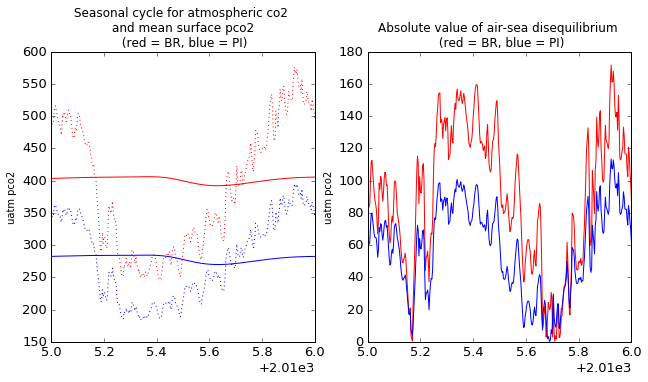

In [10]:
fact = 0.52
fig = plt.figure(figsize=(20*fact,10*fact))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(dec_time_array,atcco2_array, 'r-')
ax1.plot(dec_time_array,pco2_daily_mean_BR3, 'r:')
ax1.plot(dec_time_array,atcco2_array_PI, 'b-')
ax1.plot(dec_time_array,pco2_daily_mean_PI4, 'b:')
ax1.set_title('Seasonal cycle for atmospheric co2 \n and mean surface pco2 \n (red = BR, blue = PI)')
ax1.set_ylabel('uatm pco2')

diseq_BR3 = np.abs(atcco2_array-pco2_daily_mean_BR3)
diseq_PI4 = np.abs(atcco2_array_PI-pco2_daily_mean_PI4)
ax1 = fig.add_subplot(1,2,2)
ax1.plot(dec_time_array,diseq_BR3, 'r-')
ax1.plot(dec_time_array,diseq_PI4, 'b-')

ax1.set_title('Absolute value of air-sea disequilibrium \n (red = BR, blue = PI)')
ax1.set_ylabel('uatm pco2')

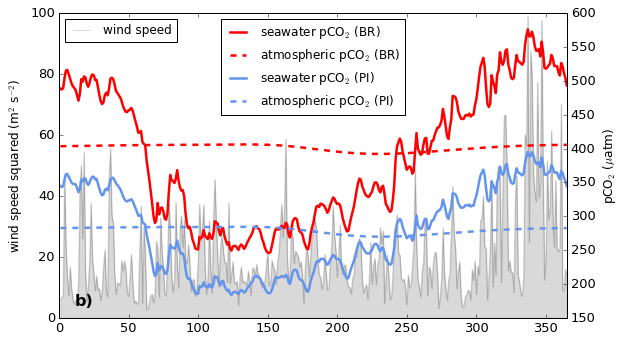

In [11]:
def plot_b(ax, fs):
    lw = 2.5
    alph = 0.15
    days = np.arange(1,366,1)
    #windspeed
    ax.plot(days,wind_daily_mean_squared,'-k', alpha = alph, label = 'wind speed')
    ax.fill_between(days, np.zeros_like(wind_daily_mean_squared), (wind_daily_mean_squared), \
                 color = 'k', alpha = alph )
    ax.set_ylim([0,100])
    ax.set_xlim([0,365])
    ax.set_ylabel('wind speed squared (m$^2$ s$^{-2}$)', fontsize = fs)
    axb =ax.twinx()
    axb.plot(days,pco2_daily_mean_BR3,'-r', linewidth = lw, label = 'seawater pCO$_2$ (BR)')
    axb.plot(days,atcco2_array,color = 'r', linewidth = lw, linestyle = '--', label = 'atmospheric pCO$_2$ (BR)' )

    axb.plot(days,pco2_daily_mean_PI4, color = 'cornflowerblue', linewidth = lw, linestyle = '-', label = 'seawater pCO$_2$ (PI)')
    axb.plot(days,atcco2_array_PI,color = 'cornflowerblue', linestyle = '--', linewidth = lw, label = 'atmospheric pCO$_2$ (PI)' )

    axb.legend(loc = 'best')
    axb.set_ylabel('pCO$_2#$ ($\mu$atm)', fontsize = fs)
    
    # axb.axhline(y=409, color = 'r', linestyle = ':')

    axb.set_xlim([0,365])
    ax.text(0.03, 0.03, 'b)', transform=ax.transAxes, fontsize=16, fontweight='bold', va='bottom')
    ax.legend(loc = 'best')
    #ax.grid()
    
fig = plt.figure(figsize=(17.5*fact, 10.5*fact))
ax1 = plt.subplot2grid((1,3), (0,0), colspan=3, rowspan=1) # topleft

plot_b(ax1,12)

Text(0.5, 1.0, 'individual stations')

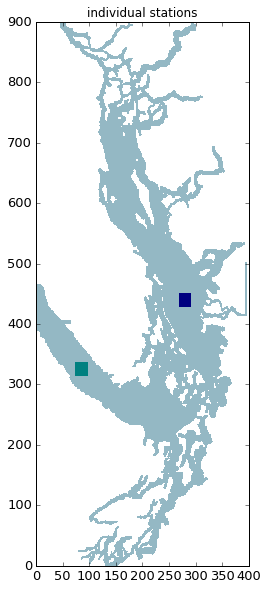

In [12]:
jdf_x = 85; jdf_y = 325; jdf_col = 'teal'
#jdf2_x = 50; jdf2_y = 370; jdf2_col = 'mediumaquamarine'
#jdf3_x = 130; jdf3_y = 290; jdf3_col = 'lightseagreen'

#cs_x = 250; cs_y = 500; cs_col = 'royalblue'
cs2_x = 280; cs2_y = 440; cs2_col = 'navy'
#cs3_x = 220; cs3_y = 540; cs3_col = 'dodgerblue'

# haro_x = 230; haro_y = 310; haro_col = 'tomato'
# haro2_x = 340; haro2_y = 290; haro2_col = 'firebrick'
# haro3_x = 260; haro3_y = 335; haro3_col = 'indianred'


# ns_x = 160; ns_y = 680; ns_col = 'olive'
# ns2_x = 150; ns2_y = 640; ns2_col = 'yellowgreen'
# ns3_x = 155; ns3_y = 710; ns3_col = 'palegoldenrod'


w = nc.Dataset('/data/tjarniko/results/hindcast.201905_dayavg_OmA-pH-pCO2/OmA_plus_20070104.nc')
pco2 = w['model_output']['pCO2'][:]
pco2[pco2>2e5] = np.nan
pco2[pco2<2000] = 500
fact = 1.5
fig = plt.figure(figsize=(12*fact,6.5*fact))

ax0 = fig.add_subplot(1,2,1)
#toba and bute

im = ax0.pcolormesh(pco2, cmap=cm.balance_r, vmin = 0, vmax = 800)
viz_tools.set_aspect(ax0)
#jdf
rect_jdf = Rectangle((jdf_x-10,jdf_y-10),20,20,linewidth=2,edgecolor=jdf_col,facecolor=jdf_col)
ax0.add_patch(rect_jdf)
#rect_jdf = Rectangle((jdf2_x-10,jdf2_y-10),20,20,linewidth=2,edgecolor=jdf2_col,facecolor=jdf2_col)
#ax0.add_patch(rect_jdf)
#rect_jdf = Rectangle((jdf3_x-10,jdf3_y-10),20,20,linewidth=2,edgecolor=jdf3_col,facecolor=jdf3_col)
#ax0.add_patch(rect_jdf)

# rect_haro = Rectangle((haro_x-10,haro_y-10),20,20,linewidth=2,edgecolor=haro_col,facecolor=haro_col)
# ax0.add_patch(rect_haro)
# rect_haro = Rectangle((haro2_x-10,haro2_y-10),20,20,linewidth=2,edgecolor=haro2_col,facecolor=haro2_col)
# ax0.add_patch(rect_haro)
# rect_haro = Rectangle((haro3_x-10,haro3_y-10),20,20,linewidth=2,edgecolor=haro3_col,facecolor=haro3_col)
# ax0.add_patch(rect_haro)

#rect_cs = Rectangle((cs_x-10,cs_y-10),20,20,linewidth=2,edgecolor=cs_col,facecolor=cs_col)
#ax0.add_patch(rect_cs)
rect_cs = Rectangle((cs2_x-10,cs2_y-10),20,20,linewidth=2,edgecolor=cs2_col,facecolor=cs2_col)
ax0.add_patch(rect_cs)
#rect_cs = Rectangle((cs3_x-10,cs3_y-10),20,20,linewidth=2,edgecolor=cs3_col,facecolor=cs3_col)
#ax0.add_patch(rect_cs)

# rect_ns = Rectangle((ns_x-10,ns_y-10),20,20,linewidth=2,edgecolor=ns_col,facecolor=ns_col)
# ax0.add_patch(rect_ns)
# rect_ns = Rectangle((ns2_x-10,ns2_y-10),20,20,linewidth=2,edgecolor=ns2_col,facecolor=ns2_col)
# ax0.add_patch(rect_ns)
# rect_ns = Rectangle((ns3_x-10,ns3_y-10),20,20,linewidth=2,edgecolor=ns3_col,facecolor=ns3_col)
# ax0.add_patch(rect_ns)

ax0.set_title('individual stations')




reload(ebmBOX)

    # reload(ebmBOX)

    # #(start, end, ftype, sdir, varname, fname, y, x)
    # pkldir = '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/'
    # start = '2015-01-01' #start of timeperiod
    # end = '2015-12-31' #end of timeperiod (typically a year)
    # ftype = 'carp' #type of model result .nc 
    # sdir = 'MAIN/BR_3rd_2015' #where under directory tree do we find ncs 
    # varname = 'dissolved_inorganic_carbon' #name of variable
    # fname = pkldir + 'BR3_DIC_means_cs2_BOX'
    # y = cs2_y; x = cs2_x
    # ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )

run for PI4, BR3 for the above 2 stations, usage case above

DIC, sal done - need temp, TA for 

In [13]:
# reload(ebmBOX)

# #BR - TA
# #(start, end, ftype, sdir, varname, fname, y, x)
# pkldir = '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/'
# start = '2015-01-01' #start of timeperiod
# end = '2015-12-31' #end of timeperiod (typically a year)
# sdir = 'MAIN/BR_3rd_2015' #where under directory tree do we find ncs 

# # ftype = 'carp' #type of model result .nc 
# # varname = 'total_alkalinity' #name of variable
# # fname = pkldir + 'BR3_TA_means_jdf_BOX'
# # y = jdf_y; x = jdf_x
# # ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )

# # ftype = 'grid_T' #type of model result .nc 
# # varname = 'votemper' #name of variable
# # fname = pkldir + 'BR3_temp_means_jdf_BOX'
# # y = jdf_y; x = jdf_x
# # ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )

# # ftype = 'carp' #type of model result .nc 
# # varname = 'total_alkalinity' #name of variable
# # fname = pkldir + 'BR3_TA_means_cs2_BOX'
# # y = cs2_y; x = cs2_x
# # ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )

# # ftype = 'grid_T' #type of model result .nc 
# # varname = 'votemper' #name of variable
# # fname = pkldir + 'BR3_temp_means_cs2_BOX'
# # y = cs2_y; x = cs2_x
# # ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )

# sdir = 'PILA4/PI4' #where under directory tree do we find ncs 


# # ftype = 'carp' #type of model result .nc 
# # varname = 'total_alkalinity' #name of variable
# # fname = pkldir + 'PI4_TA_means_jdf_BOX'
# # y = jdf_y; x = jdf_x
# # ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )

# # ftype = 'grid_T' #type of model result .nc 
# # varname = 'votemper' #name of variable
# # fname = pkldir + 'PI4_temp_means_jdf_BOX'
# # y = jdf_y; x = jdf_x
# # ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )

# # ftype = 'carp' #type of model result .nc 
# # varname = 'total_alkalinity' #name of variable
# # fname = pkldir + 'PI4_TA_means_cs2_BOX'
# # y = cs2_y; x = cs2_x
# # ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )

# ftype = 'grid_T' #type of model result .nc 
# varname = 'votemper' #name of variable
# fname = pkldir + 'PI4_temp_means_cs2_BOX'
# y = cs2_y; x = cs2_x
# ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )

In [14]:
import sys
sys.path.append('/data/tjarniko/mocsy')
import mocsy

BR3_DIC_jdf = pickle.load(open('../pkls/BR3_DIC_means_jdf_BOX.pkl','rb'))
BR3_TA_jdf = pickle.load(open('../pkls/BR3_TA_means_jdf_BOX.pkl','rb'))
BR3_sal_jdf = pickle.load(open('../pkls/BR3_sal_means_jdf_BOX.pkl','rb'))
BR3_temp_jdf = pickle.load(open('../pkls/BR3_temp_means_jdf_BOX.pkl','rb'))

PI4_DIC_jdf = pickle.load(open('../pkls/PI4_DIC_means_jdf_BOX.pkl','rb'))
PI4_TA_jdf = pickle.load(open('../pkls/PI4_TA_means_jdf_BOX.pkl','rb'))
PI4_sal_jdf = pickle.load(open('../pkls/PI4_sal_means_jdf_BOX.pkl','rb'))
PI4_temp_jdf = pickle.load(open('../pkls/PI4_temp_means_jdf_BOX.pkl','rb'))

BR3_DIC_cs2 = pickle.load(open('../pkls/BR3_DIC_means_cs2_BOX.pkl','rb'))
BR3_TA_cs2 = pickle.load(open('../pkls/BR3_TA_means_cs2_BOX.pkl','rb'))
BR3_sal_cs2 = pickle.load(open('../pkls/BR3_sal_means_cs2_BOX.pkl','rb'))
BR3_temp_cs2 = pickle.load(open('../pkls/BR3_temp_means_cs2_BOX.pkl','rb'))

PI4_DIC_cs2 = pickle.load(open('../pkls/PI4_DIC_means_cs2_BOX.pkl','rb'))
PI4_TA_cs2 = pickle.load(open('../pkls/PI4_TA_means_cs2_BOX.pkl','rb'))
PI4_sal_cs2 = pickle.load(open('../pkls/PI4_sal_means_cs2_BOX.pkl','rb'))
PI4_temp_cs2 = pickle.load(open('../pkls/PI4_temp_means_cs2_BOX.pkl','rb'))



BR3_DIC_cs2_s = BR3_DIC_cs2[0,:]*1e-3
BR3_TA_cs2_s = BR3_TA_cs2[0,:]*1e-3
BR3_sal_cs2_s = BR3_sal_cs2[0,:]
BR3_temp_cs2_s = BR3_temp_cs2[0,:]
tzero = np.zeros_like(BR3_sal_cs2_s)


response_tup = mocsy.mvars(temp=BR3_temp_cs2_s, sal=BR3_sal_cs2_s, alk=BR3_TA_cs2_s, dic=BR3_DIC_cs2_s, 
                       sil=tzero, phos=tzero, patm=tzero, depth=tzero, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH_BR3_cs2,pco2_BR3_cs2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

PI4_DIC_cs2_s = PI4_DIC_cs2[0,:]*1e-3
PI4_TA_cs2_s = PI4_TA_cs2[0,:]*1e-3
PI4_sal_cs2_s = PI4_sal_cs2[0,:]
PI4_temp_cs2_s = PI4_temp_cs2[0,:]
tzero = np.zeros_like(PI4_sal_cs2_s)


response_tup = mocsy.mvars(temp=PI4_temp_cs2_s, sal=PI4_sal_cs2_s, alk=PI4_TA_cs2_s, dic=PI4_DIC_cs2_s, 
                       sil=tzero, phos=tzero, patm=tzero, depth=tzero, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH_PI4_cs2,pco2_PI4_cs2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

BR3_DIC_jdf_s = BR3_DIC_jdf[0,:]*1e-3
BR3_TA_jdf_s = BR3_TA_jdf[0,:]*1e-3
BR3_sal_jdf_s = BR3_sal_jdf[0,:]
BR3_temp_jdf_s = BR3_temp_jdf[0,:]
tzero = np.zeros_like(BR3_sal_jdf_s)


response_tup = mocsy.mvars(temp=BR3_temp_jdf_s, sal=BR3_sal_jdf_s, alk=BR3_TA_jdf_s, dic=BR3_DIC_jdf_s, 
                       sil=tzero, phos=tzero, patm=tzero, depth=tzero, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH_BR3_jdf,pco2_BR3_jdf,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

PI4_DIC_jdf_s = PI4_DIC_jdf[0,:]*1e-3
PI4_TA_jdf_s = PI4_TA_jdf[0,:]*1e-3
PI4_sal_jdf_s = PI4_sal_jdf[0,:]
PI4_temp_jdf_s = PI4_temp_jdf[0,:]
tzero = np.zeros_like(PI4_sal_jdf_s)


response_tup = mocsy.mvars(temp=PI4_temp_jdf_s, sal=PI4_sal_jdf_s, alk=PI4_TA_jdf_s, dic=PI4_DIC_jdf_s, 
                       sil=tzero, phos=tzero, patm=tzero, depth=tzero, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH_PI4_jdf,pco2_PI4_jdf,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

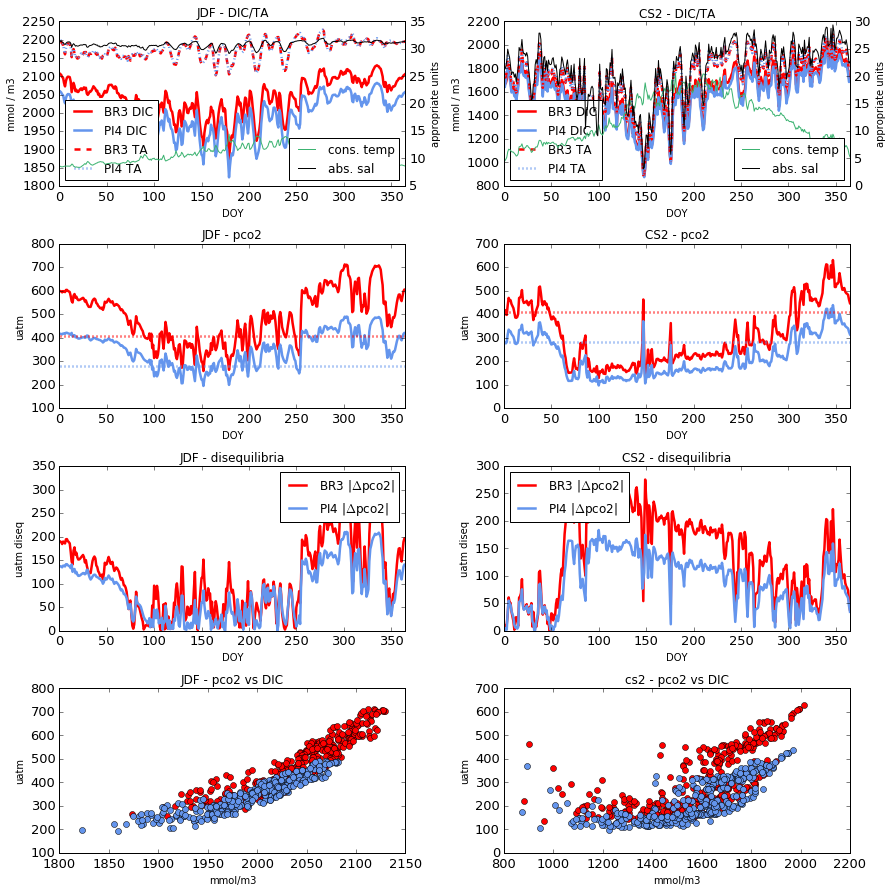

In [15]:
fact = 1.25
fig = plt.figure(figsize=(10*fact,10*fact))

lw = 2.5
days_in = np.arange(1,366,1)


#JDF
ax1 = fig.add_subplot(4,2,1)
ax1.set_title('JDF - DIC/TA')
ax1b = ax1.twinx()
ax1b.plot(days_in, PI4_temp_jdf_s, color = 'mediumseagreen', label = 'cons. temp')
ax1b.plot(days_in, PI4_sal_jdf_s, color = 'black', label = 'abs. sal')
ax1.plot(days_in, BR3_DIC_jdf_s*1000, color = 'red', linewidth = lw, label = 'BR3 DIC')
ax1.plot(days_in, PI4_DIC_jdf_s*1000, color = 'cornflowerblue', linewidth = lw, label = 'PI4 DIC')
ax1.plot(days_in, BR3_TA_jdf_s*1000, color = 'red', linewidth = lw, linestyle = '--', label = 'BR3 TA')
ax1.plot(days_in, PI4_TA_jdf_s*1000, color = 'cornflowerblue', linewidth = lw, linestyle = ':', label = 'PI4 TA')
ax1.set_xlim(0,365)
ax1b.legend(loc = 'lower right')
ax1.legend(loc = 'lower left')
ax1.set_xlabel('DOY')
ax1.set_ylabel('mmol / m3')
ax1b.set_ylabel('appropriate units')

ax1 = fig.add_subplot(4,2,2)
ax1.set_title('CS2 - DIC/TA')
ax1b = ax1.twinx()
ax1b.plot(days_in, PI4_temp_cs2_s, color = 'mediumseagreen', label = 'cons. temp')
ax1b.plot(days_in, PI4_sal_cs2_s, color = 'black', label = 'abs. sal')
ax1.plot(days_in, BR3_DIC_cs2_s*1000, color = 'red', linewidth = lw, label = 'BR3 DIC')
ax1.plot(days_in, PI4_DIC_cs2_s*1000, color = 'cornflowerblue', linewidth = lw, label = 'PI4 DIC')
ax1.plot(days_in, BR3_TA_cs2_s*1000, color = 'red', linewidth = lw, linestyle = '--', label = 'BR3 TA')
ax1.plot(days_in, PI4_TA_cs2_s*1000, color = 'cornflowerblue', linewidth = lw, linestyle = ':', label = 'PI4 TA')
ax1.set_xlim(0,365)
ax1b.legend(loc = 'lower right')
ax1.legend(loc = 'lower left')
ax1.set_xlabel('DOY')
ax1.set_ylabel('mmol / m3')
ax1b.set_ylabel('appropriate units')

ax1 = fig.add_subplot(4,2,3)
ax1.set_title('JDF - pco2') 
ax1.plot(days_in, pco2_BR3_jdf, color = 'red', linewidth = lw, label = 'BR3 pco2')
ax1.plot(days_in, pco2_PI4_jdf, color = 'cornflowerblue', linewidth = lw, label = 'PI4 pco2')
ax1.plot(days_in, np.zeros(365)+409, color = 'red', linewidth = lw, linestyle = ':')
ax1.plot(days_in, np.zeros(365)+280, color = 'cornflowerblue', linewidth = lw, linestyle = ':')
ax1.set_xlim(0,365)
ax1.set_xlabel('DOY')
ax1.set_ylabel('uatm')

ax1 = fig.add_subplot(4,2,4)
ax1.set_title('CS2 - pco2') 
ax1.plot(days_in, pco2_BR3_cs2, color = 'red', linewidth = lw, label = 'BR3 pco2')
ax1.plot(days_in, pco2_PI4_cs2, color = 'cornflowerblue', linewidth = lw, label = 'PI4 pco2')
ax1.plot(days_in, np.zeros(365)+409, color = 'red', linewidth = lw, linestyle = ':')
ax1.plot(days_in, np.zeros(365)+280, color = 'cornflowerblue', linewidth = lw, linestyle = ':')
ax1.set_xlim(0,365)
ax1.set_xlabel('DOY')
ax1.set_ylabel('uatm')

ax1 = fig.add_subplot(4,2,5)
ax1.set_title('JDF - disequilibria') 
ax1.plot(days_in, np.abs(pco2_BR3_jdf-409), color = 'red', linewidth = lw, label = 'BR3 |$\Delta$pco2|')
ax1.plot(days_in, np.abs(pco2_PI4_jdf-280), color = 'cornflowerblue', linewidth = lw, label = 'PI4 |$\Delta$pco2|')
ax1.set_xlim(0,365)
ax1.legend(loc = 'upper right')
ax1.set_xlabel('DOY')
ax1.set_ylabel('uatm diseq')

ax1 = fig.add_subplot(4,2,6)
ax1.set_title('CS2 - disequilibria') 
ax1.plot(days_in, np.abs(pco2_BR3_cs2-409), color = 'red', linewidth = lw, label = 'BR3 |$\Delta$pco2|')
ax1.plot(days_in, np.abs(pco2_PI4_cs2-280), color = 'cornflowerblue', linewidth = lw, label = 'PI4 |$\Delta$pco2|')
ax1.legend(loc = 'upper left')
ax1.set_xlim(0,365)
ax1.set_xlabel('DOY')
ax1.set_ylabel('uatm diseq')

ax1 = fig.add_subplot(4,2,7)
ax1.set_title('JDF - pco2 vs DIC') 
ax1.plot(BR3_DIC_jdf_s*1000, pco2_BR3_jdf, marker = 'o', linestyle = '', color = 'red', linewidth = lw, label = '')
ax1.plot(PI4_DIC_jdf_s*1000, pco2_PI4_jdf, marker = 'o', linestyle = '', color = 'cornflowerblue', linewidth = lw, label = '')
ax1.set_ylabel('uatm')
ax1.set_xlabel('mmol/m3')

ax1 = fig.add_subplot(4,2,8)
ax1.set_title('cs2 - pco2 vs DIC') 
ax1.plot(BR3_DIC_cs2_s*1000, pco2_BR3_cs2, marker = 'o', linestyle = '', color = 'red', linewidth = lw, label = '')
ax1.plot(PI4_DIC_cs2_s*1000, pco2_PI4_cs2, marker = 'o', linestyle = '', color = 'cornflowerblue', linewidth = lw, label = '')
ax1.set_ylabel('uatm')
ax1.set_xlabel('mmol/m3')

plt.tight_layout()

Text(0.5, 0, 'mmol/m3')

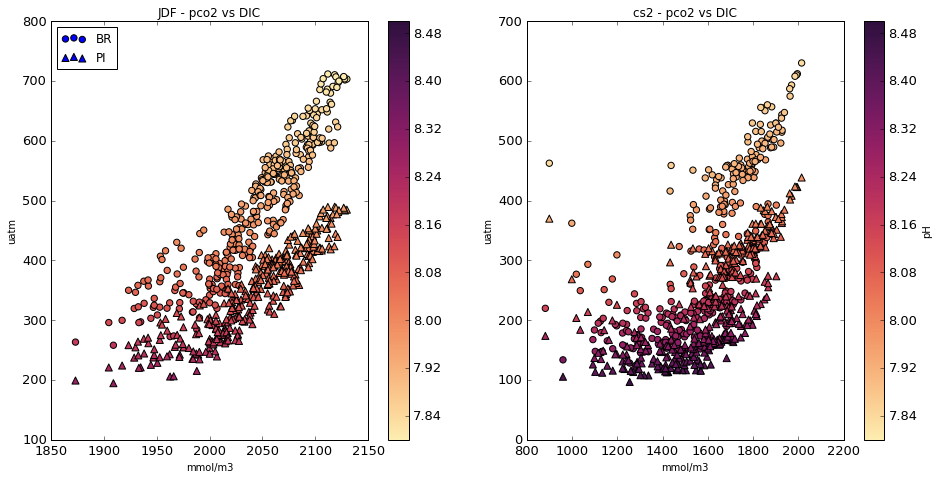

In [22]:
fact = 1.25
fig = plt.figure(figsize=(12.5*fact,6*fact))
ms = 9

lw = 2.5
days_in = np.arange(1,366,1)

ax1 = fig.add_subplot(1,2,1)
ax1.set_title('JDF - pco2 vs DIC') 
t_DIC = BR3_DIC_jdf_s*1000
t_pco2 = pco2_BR3_jdf
t_ph = pH_BR3_jdf

tcmap = cm.matter
plt.scatter(t_DIC,t_pco2,c=t_ph, s = 40, vmin=7.8, vmax = 8.5, cmap = tcmap, label = 'BR')

t_pco2 = pco2_PI4_jdf
t_ph = pH_PI4_jdf

plt.scatter(t_DIC,t_pco2,c=t_ph, s = 50, marker = '^', vmin=7.8, vmax = 8.5, cmap = tcmap, label = 'PI')

plt.colorbar(label = 'pH')

plt.legend(loc = 'upper left')
ax1.set_ylabel('uatm')
ax1.set_xlabel('mmol/m3')

ax1 = fig.add_subplot(1,2,2)
ax1.set_title('cs2 - pco2 vs DIC') 
t_DIC = BR3_DIC_cs2_s*1000
t_pco2 = pco2_BR3_cs2
t_ph = pH_BR3_cs2

tcmap = cm.matter
plt.scatter(t_DIC,t_pco2,c=t_ph, s = 40, vmin=7.8, vmax = 8.5, cmap = tcmap, label = 'BR')

t_pco2 = pco2_PI4_cs2
t_ph = pH_PI4_cs2
plt.scatter(t_DIC,t_pco2,c=t_ph, s = 50, marker = '^', vmin=7.8, vmax = 8.5, cmap = tcmap, label = 'PI')
plt.colorbar(label = 'pH')

ax1.set_ylabel('uatm')
ax1.set_xlabel('mmol/m3')



Text(0.5, 0, 'mmol/m3')

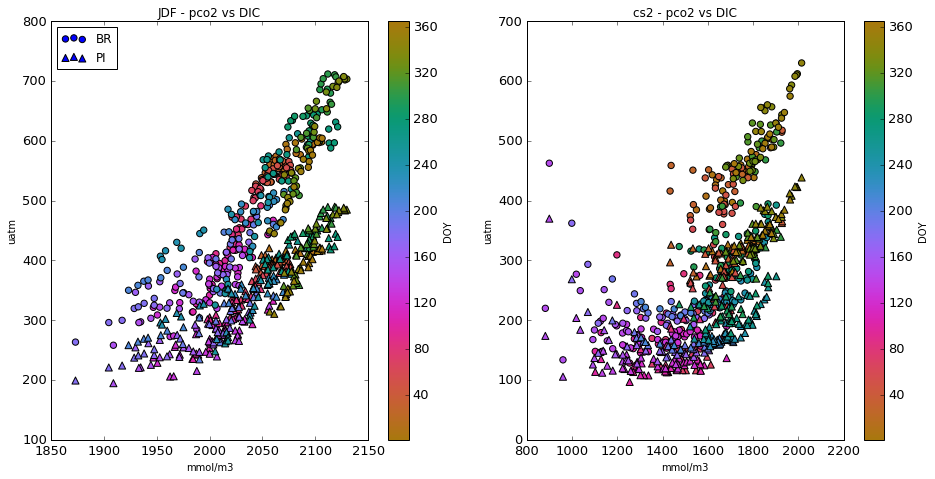

In [23]:

fact = 1.25
fig = plt.figure(figsize=(12.5*fact,6*fact))
ms = 9

lw = 2.5
days_in = np.arange(1,366,1)

ax1 = fig.add_subplot(1,2,1)
ax1.set_title('JDF - pco2 vs DIC') 
t_DIC = BR3_DIC_jdf_s*1000
t_pco2 = pco2_BR3_jdf
t_ph = pH_BR3_jdf

tcmap = cm.phase
plt.scatter(t_DIC,t_pco2,c=days_in, s = 40, vmin=1, vmax = 365, cmap = tcmap, label = 'BR')

t_pco2 = pco2_PI4_jdf
t_ph = pH_PI4_jdf

plt.scatter(t_DIC,t_pco2,c=days_in, s = 50, marker = '^', vmin=1, vmax = 365, cmap = tcmap, label = 'PI')

plt.colorbar(label = 'DOY')  
plt.legend(loc = 'upper left')
ax1.set_ylabel('uatm')
ax1.set_xlabel('mmol/m3')

ax1 = fig.add_subplot(1,2,2)
ax1.set_title('cs2 - pco2 vs DIC') 
t_DIC = BR3_DIC_cs2_s*1000
t_pco2 = pco2_BR3_cs2
t_ph = pH_BR3_cs2


plt.scatter(t_DIC,t_pco2,c=days_in, s = 40, vmin=1, vmax = 365, cmap = tcmap, label = 'BR')

t_pco2 = pco2_PI4_cs2
t_ph = pH_PI4_cs2
plt.scatter(t_DIC,t_pco2,c=days_in, s = 50, marker = '^',vmin=1, vmax = 365, cmap = tcmap, label = 'PI')
plt.colorbar(label = 'DOY')  

ax1.set_ylabel('uatm')
ax1.set_xlabel('mmol/m3')